<a href="https://colab.research.google.com/github/Mayurd9/CNN-Classification/blob/main/Fashion%20MNIST/FashionMNIST_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

# **$\textbf{Loading the Data}$**

In [ ]:
#Setup training data
from torchvision import datasets
train_data= datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor(),target_transform=None)
test_data=datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor(),target_transform=None)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
Class_to_idx=train_data.class_to_idx
Class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
np.unique(train_data.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(-0.5, 27.5, 27.5, -0.5)

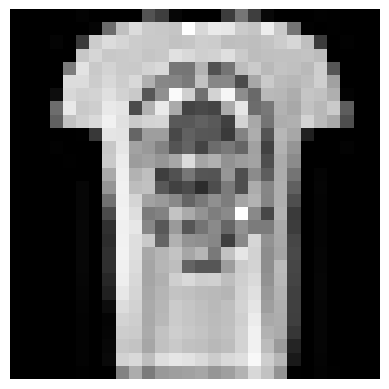

In [ ]:
#showing a random image
plt.imshow(train_data[np.random.randint(0,60000)][0].squeeze(),cmap='gray')
plt.axis(False)

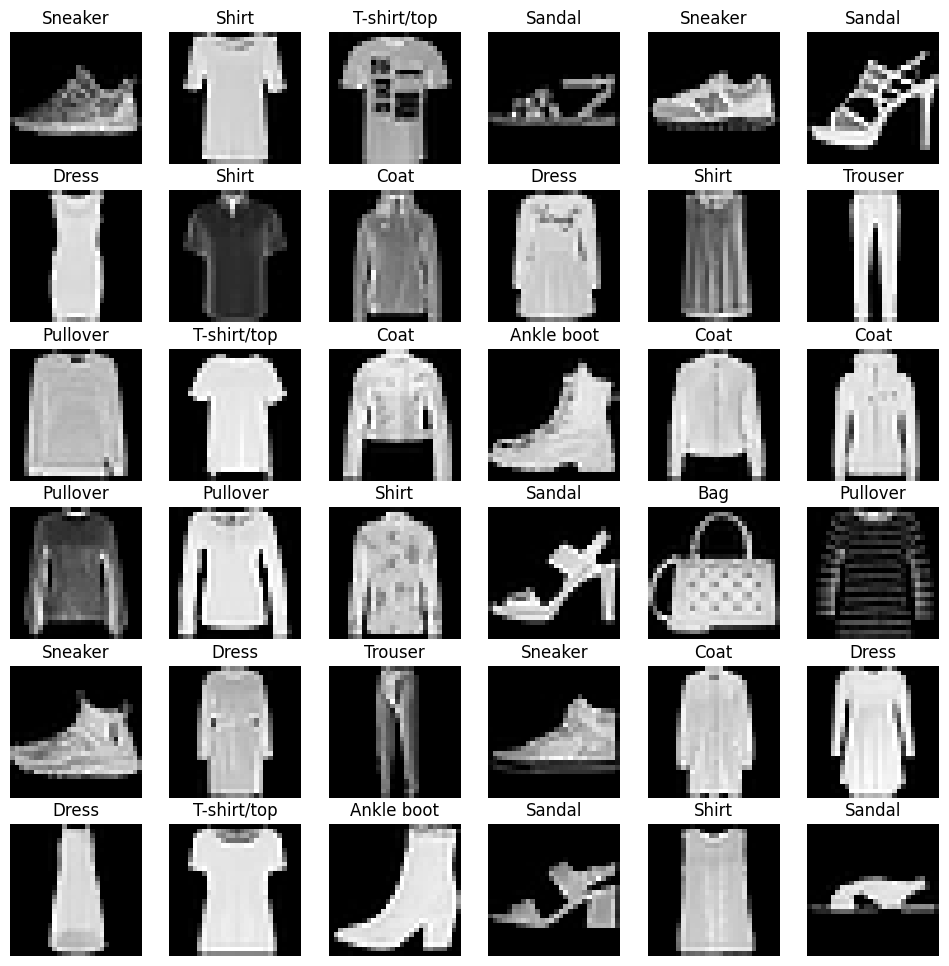

In [ ]:
#Visualizing the data
fig=plt.figure(figsize=(12,12))
rows, cols=6,6
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

# $\textbf{DataLoader}$

In [ ]:
 #Prepare dataloader
from torch.utils.data import DataLoader
BATCH_SIZE=32

train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x792ae8ba6620>,
 <torch.utils.data.dataloader.DataLoader at 0x792aea7bbeb0>)

In [ ]:
print(f"train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE} samples each")
print(f"test_dataloader:{len(test_dataloader)} batches of {BATCH_SIZE} samples each")

train_dataloader:1875 batches of 32 samples each
test_dataloader:313 batches of 32 samples each


In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# $\textbf{Creating CNN Model}$

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_block1=nn.Sequential(nn.Conv2d(in_channels=1,out_channels=40,kernel_size=3,stride=1,padding=1),
                                   nn.ReLU(),
                                   nn.Conv2d(in_channels=40,out_channels=30,kernel_size=3,stride=1,padding=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2))
    self.conv_block2=nn.Sequential(nn.Conv2d(in_channels=30,out_channels=20,kernel_size=3,stride=1,padding=1),
                                   nn.ReLU(),
                                   nn.Conv2d(in_channels=20,out_channels=10,kernel_size=3,stride=1,padding=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2))
    self.classifier=nn.Sequential(nn.Flatten(),
                                  nn.Linear(in_features=10*7*7 ,out_features=800),
                                  nn.Dropout(p=0.5),
                                  nn.ReLU(),
                                  nn.Linear(in_features=800,out_features=500),
                                  nn.Dropout(p=0.5),
                                  nn.ReLU(),
                                  nn.Linear(in_features=500,out_features=10),
                                  nn.Dropout(p=0.5),
                                  nn.ReLU())

  def forward(self,x):
    z = self.conv_block1(x)
    z = self.conv_block2(z)
    z = self.classifier(z)
    return z

In [ ]:
#Creating an instance of the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0=FashionMNISTModelV2().to(device)
model_0

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(30, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=800, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=800, out_features=500, bias=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): ReLU()
    (7): Linear(in_features=500, out_features=10, bias=True)
    (8): Dropout(

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.08)

In [ ]:
def accuracy_fn(y_true,y_pred):
  return (torch.sum(y_true==y_pred)/len(y_true))*100

# $\textbf{Training}$

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=120

for epoch in tqdm(range(epochs)):

  train_loss,train_acc=0,0
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    X,y=X.to(device),y.to(device)
    y_logits=model_0(X)
    loss=loss_fn(y_logits,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
      train_acc+=accuracy_fn(y_true=y,y_pred=torch.argmax(torch.softmax(model_0(X), dim=1),dim=1))/len(train_dataloader)

  train_loss/=len(train_dataloader)

  model_0.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for (X,y) in test_dataloader:
      X,y = X.to(device) , y.to(device)
      test_logits=model_0(X)
      test_preds=torch.argmax(torch.softmax(test_logits,dim=1),dim=1)
      test_loss+=loss_fn(test_logits,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_preds)

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  print(f"Epoch:{epoch}, train loss:{train_loss}, test loss:{test_loss}, train accuracy:{train_acc}, test accuracy:{test_acc}")

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch:0, train loss:1.7712373733520508, test loss:0.869063675403595, train accuracy:65.55146026611328, test accuracy:82.6777114868164
Epoch:1, train loss:1.4634270668029785, test loss:0.7804341912269592, train accuracy:87.95158386230469, test accuracy:85.13378143310547
Epoch:2, train loss:1.421291470527649, test loss:0.6837611794471741, train accuracy:90.19821166992188, test accuracy:87.00079345703125
Epoch:3, train loss:1.3881890773773193, test loss:0.6056953072547913, train accuracy:91.52496337890625, test accuracy:88.50838470458984
Epoch:4, train loss:1.367919683456421, test loss:0.5747448801994324, train accuracy:92.3566665649414, test accuracy:89.46685028076172
Epoch:5, train loss:1.3546643257141113, test loss:0.5512051582336426, train accuracy:92.87511444091797, test accuracy:89.38697814941406
Epoch:6, train loss:1.3529807329177856, test loss:0.5272514820098877, train accuracy:93.30350494384766, test accuracy:89.99600219726562
Epoch:7, train loss:1.3287996053695679, test loss:0.5

In [ ]:
torch.save(obj=model_0.state_dict(),f='model_0')

# **$\textbf{Evaluating the model}$**

In [ ]:
def eval_model(model,dataloader):
  model.eval()
  with torch.inference_mode():
    loss,acc=0,0
    for (X,y) in tqdm(dataloader):
      X,y=X.to(device),y.to(device)
      logits=model(X)
      preds=torch.argmax(torch.softmax(logits,dim=1),dim=1)
      loss+=loss_fn(logits,y)
      acc+=accuracy_fn(y,preds)
    loss/=len(dataloader)
    acc/=len(dataloader)

  print(f"Accuracy:{acc},loss:{loss}")

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0=FashionMNISTModelV2().to(device)
model_0.load_state_dict(torch.load(f='model_0'))
model_0.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(30, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=800, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=800, out_features=500, bias=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): ReLU()
    (7): Linear(in_features=500, out_features=10, bias=True)
    (8): Dropout(

In [ ]:
model_0_results=eval_model(model=model_0,dataloader=test_dataloader)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

Accuracy:92.03274536132812,loss:0.38093554973602295


# **$\textbf{Testing Random Image}$**

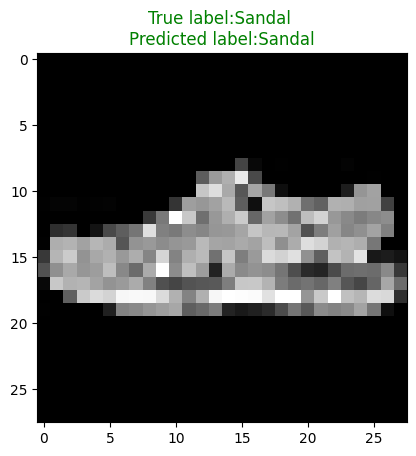

In [ ]:
X,y=next(iter(test_dataloader))
idx=np.random.randint(32)
img,label=X[idx],y[idx]
img=torch.unsqueeze(img, dim=0).to(device)
model_0.eval()
with torch.inference_mode():
  pred_label=torch.argmax(torch.softmax(model_0(img),dim=1))
plt.imshow(img.squeeze().cpu(),cmap='gray')
if label==pred_label:
  plt.title(f"True label:{class_names[label]} \nPredicted label:{class_names[pred_label]}", c='g')
else:
    plt.title(f"True label:{class_names[label]} \nPredicted label:{class_names[pred_label]}", c='r')

# $\textbf{Confusion Matrix}$

In [ ]:
import torchmetrics

In [ ]:
y_preds=[]
model_0.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):
    X,y=X.to(device),y.to(device)
    y_logits=model_0(X)
    y_pred=torch.argmax(torch.softmax(y_logits,dim=1),dim=1)
    y_preds.append(y_pred.cpu())

y_preds_tensor=torch.cat(y_preds)
y_preds_tensor

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
len(y_preds_tensor)

10000

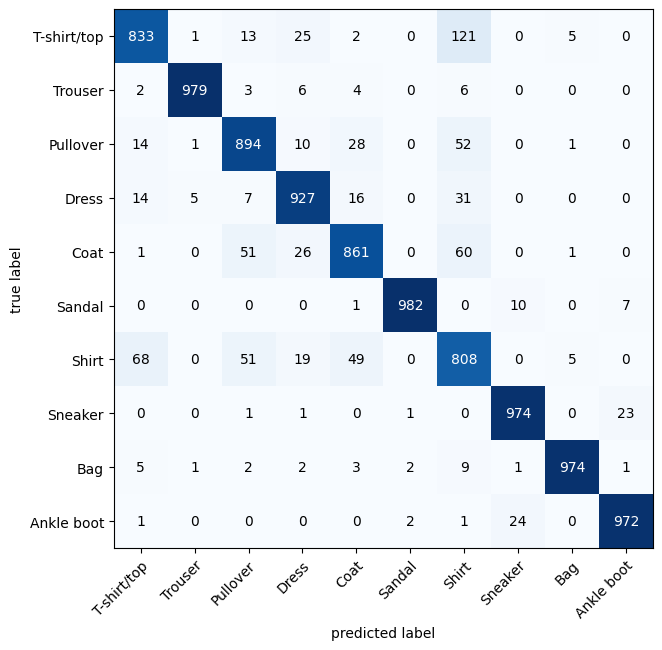

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor=confmat(preds=y_preds_tensor,target=test_data.targets)

fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_names,figsize=(10,7))